# Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import curve_fit
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#This function deals with differentiation of angle within [-pi,pi).
#It will fail if angle array x change too fast.
def angular_gradient(x):
    diffx= np.gradient(x)
    diffx[np.abs(diffx)>0.6*np.pi] -= np.pi*diffx[np.abs(diffx)>0.6*np.pi]/abs(diffx[np.abs(diffx)>0.6*np.pi])
    return diffx

# main

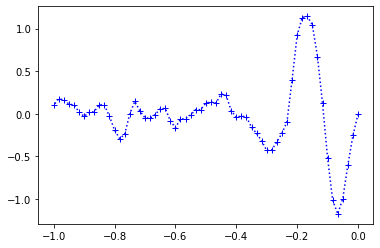

In [3]:
fig, ax = plt.subplots()
exp_folder = 'D:\\GoogleDrive\\retina\\Chou\'s data\\20210504'
annots = loadmat(exp_folder+'\\merge\\merge_0224_cSTA_wf_3min_Q100_re', squeeze_me = True)
x = annots['bin_pos']
x = x-np.mean(x)
dt = 1/60
cn = 38-1

spike = annots['reconstruct_spikes'][cn]
rstate, _ = np.histogram(spike, np.arange(len(x)+1)*dt)
cSTA = np.correlate(x , rstate, 'same')/ np.correlate(np.ones_like(x), rstate, 'same')
cSTA = cSTA[int(len(cSTA)/2):int(len(cSTA)/2-1/dt)-1:-1]
taxis = -np.arange(len(cSTA))*dt
ax.plot(taxis, cSTA, 'b+:')

# NGD2L_FBFF 

In [4]:
def NGD2L_TK(T, alpha, beta, gamma, g, h, tau_y, Amp):
    dt = np.mean(np.diff(T))
    dt = 0.1*dt
    T = np.arange(0, T[-1]+dt, dt)
    x = T/tau_y /tau_y *np.exp(-T/tau_y)*dt
    
    y=np.zeros_like(x)
    z=np.zeros_like(x)
    w=np.zeros_like(x)
    for j in range(len(x)-1):
        dy=dt*(-alpha*y[j] + -x[j]-z[j] )
        dz=dt*(-beta *z[j]  + g*y[j] )
        dw=dt*(-gamma*w[j] + y[j]-h*z[j] )
        y[j+1]=y[j]+dy
        z[j+1]=z[j]+dz
        w[j+1]=w[j]+dw
#     print(len(w), len(w[::10]))
    return Amp*w[::10]/(dt) #normalized by integration

In [3]:
alpha, beta = 14.,14.
gamma = 36.
g = 680.
h = 0.01
tau_y = 0.027
Amp = 100
popt,pcov = curve_fit(NGD2L_TK, np.abs(taxis) , cSTA, p0=[alpha, beta, gamma, g, h, tau_y, Amp],
                      bounds = ([0     , 0     , 0     , 0     , 0     , 0     , 0     ],
                                [np.inf, np.inf, np.inf, np.inf, np.inf, 0.6   , np.inf]) )

fit_cSTA = NGD2L_TK(np.abs(taxis), *popt).copy()
error2L = sum((fit_cSTA-cSTA)**2)
ax.plot(taxis, fit_cSTA)
fig

NameError: name 'curve_fit' is not defined

In [2]:
{['alpha', 'beta', 'gamma', 'g', 'h', 'tau_y', 'Amp']:popt}

NameError: name 'popt' is not defined

In [6]:
def NGD2L_TK(T, alpha, gamma, g, h, tau_y, Amp):
    dt = np.mean(np.diff(T))
    dt = 0.1*dt
    T = np.arange(0, T[-1]+dt, dt)
    x = T/tau_y /tau_y *np.exp(-T/tau_y)*dt
    
    y=np.zeros_like(x)
    z=np.zeros_like(x)
    w=np.zeros_like(x)
    for j in range(len(x)-1):
        dy=dt*(-alpha*y[j] + -x[j]-z[j] )
        dz=dt*(-alpha *z[j]  + g*y[j] )
        dw=dt*(-gamma*w[j] + y[j]-h*z[j] )
        y[j+1]=y[j]+dy
        z[j+1]=z[j]+dz
        w[j+1]=w[j]+dw
#     print(len(w), len(w[::10]))
    return Amp*w[::10]/(dt)#normalized by integration

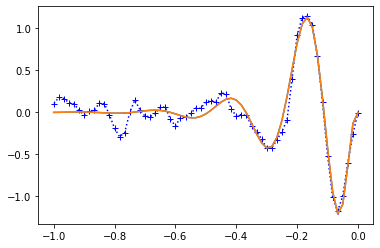

In [7]:
alpha, beta = 14.,14.
gamma = 36.
g = 680.
h = 0.01
tau_y = 0.027
Amp = 100
popt,pcov = curve_fit(NGD2L_TK, np.abs(taxis) , cSTA, p0=[alpha, gamma, g, h, tau_y, Amp],
                      bounds = ([0     , 0     , 0     , 0     , 0     , 0     ],
                                [np.inf, np.inf, np.inf, np.inf, 0.6   , np.inf]) )

fit_cSTA = NGD2L_TK(np.abs(taxis), *popt).copy()
error2LAB = sum((fit_cSTA-cSTA)**2)
ax.plot(taxis, fit_cSTA)
fig

In [11]:
error2L<error2LAB

True

In [12]:
popt

array([7.98931546e+00, 4.65192803e+01, 6.22887377e+02, 1.13341847e-02,
       2.06558468e-02, 1.75444839e+02])